### LSTM STOCK CHANGE PREDICTION

### Using Sample Dataset

In [16]:
path = "drive/MyDrive/COGS_Project/EDA/Data/Multivariate_stock_preprocessed.csv"

In [148]:
import os
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [149]:
#os.listdir(path)

In [150]:
df = pd.read_csv(path).set_index("Unnamed: 0")

In [151]:
df

,ZR=F_Open,ZR=F_High,ZR=F_Low,ZR=F_Close,ZR=F_Adj_Close,ZR=F_Volume,CL=F_Open,CL=F_High,CL=F_Low,CL=F_Close,CL=F_Adj_Close,CL=F_Volume,ZW=F_Open,ZW=F_High,ZW=F_Low,ZW=F_Close,ZW=F_Adj_Close,ZW=F_Volume
Unnamed: 0,,,,,,,,,,,,,,,,,,
2015-01-23,0.397375,0.401925,0.375000,0.373798,0.373798,0.476089,0.286604,0.292522,0.258267,0.251462,0.251462,0.241807,0.751689,0.744538,0.752197,0.738983,0.738983,0.536428
2015-01-24,0.516706,0.525872,0.531863,0.532452,0.532452,0.502125,0.478712,0.478261,0.471284,0.480564,0.480564,0.509501,0.516892,0.534454,0.511424,0.520339,0.520339,0.493559
2015-01-25,0.516706,0.525872,0.531863,0.532452,0.532452,0.502125,0.478712,0.478261,0.471284,0.480564,0.480564,0.509501,0.516892,0.534454,0.511424,0.520339,0.520339,0.493559
2015-01-26,0.356802,0.344164,0.338235,0.343750,0.343750,0.400638,0.237106,0.245565,0.228333,0.236326,0.236326,0.130318,0.738176,0.736134,0.702988,0.674576,0.674576,0.471678
2015-01-27,0.331742,0.400722,0.357843,0.364183,0.364183,0.409139,0.234683,0.250435,0.244344,0.273478,0.273478,0.134702,0.662162,0.665546,0.690685,0.664407,0.664407,0.314774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-02,0.516706,0.525872,0.531863,0.532452,0.532452,0.502125,0.478712,0.478261,0.471284,0.480564,0.480564,0.509501,0.516892,0.534454,0.511424,0.520339,0.520339,0.493559
2021-12-03,0.516706,0.525872,0.531863,0.532452,0.532452,0.502125,0.478712,0.478261,0.471284,0.480564,0.480564,0.509501,0.516892,0.534454,0.511424,0.520339,0.520339,0.493559
2021-12-04,0.516706,0.525872,0.531863,0.532452,0.532452,0.502125,0.478712,0.478261,0.471284,0.480564,0.480564,0.509501,0.516892,0.534454,0.511424,0.520339,0.520339,0.493559


In [152]:
df

,ZR=F_Open,ZR=F_High,ZR=F_Low,ZR=F_Close,ZR=F_Adj_Close,ZR=F_Volume,CL=F_Open,CL=F_High,CL=F_Low,CL=F_Close,CL=F_Adj_Close,CL=F_Volume,ZW=F_Open,ZW=F_High,ZW=F_Low,ZW=F_Close,ZW=F_Adj_Close,ZW=F_Volume
Unnamed: 0,,,,,,,,,,,,,,,,,,
2015-01-23,0.397375,0.401925,0.375000,0.373798,0.373798,0.476089,0.286604,0.292522,0.258267,0.251462,0.251462,0.241807,0.751689,0.744538,0.752197,0.738983,0.738983,0.536428
2015-01-24,0.516706,0.525872,0.531863,0.532452,0.532452,0.502125,0.478712,0.478261,0.471284,0.480564,0.480564,0.509501,0.516892,0.534454,0.511424,0.520339,0.520339,0.493559
2015-01-25,0.516706,0.525872,0.531863,0.532452,0.532452,0.502125,0.478712,0.478261,0.471284,0.480564,0.480564,0.509501,0.516892,0.534454,0.511424,0.520339,0.520339,0.493559
2015-01-26,0.356802,0.344164,0.338235,0.343750,0.343750,0.400638,0.237106,0.245565,0.228333,0.236326,0.236326,0.130318,0.738176,0.736134,0.702988,0.674576,0.674576,0.471678
2015-01-27,0.331742,0.400722,0.357843,0.364183,0.364183,0.409139,0.234683,0.250435,0.244344,0.273478,0.273478,0.134702,0.662162,0.665546,0.690685,0.664407,0.664407,0.314774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-02,0.516706,0.525872,0.531863,0.532452,0.532452,0.502125,0.478712,0.478261,0.471284,0.480564,0.480564,0.509501,0.516892,0.534454,0.511424,0.520339,0.520339,0.493559
2021-12-03,0.516706,0.525872,0.531863,0.532452,0.532452,0.502125,0.478712,0.478261,0.471284,0.480564,0.480564,0.509501,0.516892,0.534454,0.511424,0.520339,0.520339,0.493559
2021-12-04,0.516706,0.525872,0.531863,0.532452,0.532452,0.502125,0.478712,0.478261,0.471284,0.480564,0.480564,0.509501,0.516892,0.534454,0.511424,0.520339,0.520339,0.493559


In [153]:
combined_set=df.iloc[:,[0,3,6,9,12,15]]

In [154]:
combined_set

,ZR=F_Open,ZR=F_Close,CL=F_Open,CL=F_Close,ZW=F_Open,ZW=F_Close
Unnamed: 0,,,,,,
2015-01-23,0.397375,0.373798,0.286604,0.251462,0.751689,0.738983
2015-01-24,0.516706,0.532452,0.478712,0.480564,0.516892,0.520339
2015-01-25,0.516706,0.532452,0.478712,0.480564,0.516892,0.520339
2015-01-26,0.356802,0.343750,0.237106,0.236326,0.738176,0.674576
2015-01-27,0.331742,0.364183,0.234683,0.273478,0.662162,0.664407
...,...,...,...,...,...,...
2021-12-02,0.516706,0.532452,0.478712,0.480564,0.516892,0.520339
2021-12-03,0.516706,0.532452,0.478712,0.480564,0.516892,0.520339
2021-12-04,0.516706,0.532452,0.478712,0.480564,0.516892,0.520339


In [155]:
#combined_set.columns = np.arange(0,len(combined_set.columns))


In [156]:
change_name_list = []
for i in range(len(combined_set.columns)):
  change_name = str(combined_set.columns[i]) + "_" + str(i)
  change_name_list.append(change_name)
combined_set.columns  =change_name_list
  


In [157]:
combined_set.dropna()

,ZR=F_Open_0,ZR=F_Close_1,CL=F_Open_2,CL=F_Close_3,ZW=F_Open_4,ZW=F_Close_5
Unnamed: 0,,,,,,
2015-01-23,0.397375,0.373798,0.286604,0.251462,0.751689,0.738983
2015-01-24,0.516706,0.532452,0.478712,0.480564,0.516892,0.520339
2015-01-25,0.516706,0.532452,0.478712,0.480564,0.516892,0.520339
2015-01-26,0.356802,0.343750,0.237106,0.236326,0.738176,0.674576
2015-01-27,0.331742,0.364183,0.234683,0.273478,0.662162,0.664407
...,...,...,...,...,...,...
2021-12-02,0.516706,0.532452,0.478712,0.480564,0.516892,0.520339
2021-12-03,0.516706,0.532452,0.478712,0.480564,0.516892,0.520339
2021-12-04,0.516706,0.532452,0.478712,0.480564,0.516892,0.520339


In [158]:
combined_set["Change_1"]  =combined_set.iloc[:,1] - combined_set.iloc[:,0]
combined_set["Change_2"]  =combined_set.iloc[:,3] - combined_set.iloc[:,2]
combined_set["Change_3"]  =combined_set.iloc[:,5] - combined_set.iloc[:,4]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [159]:
df_list = []
for i in range(1,len(combined_set.columns),2):
  new_col = combined_set[combined_set.columns[i]] - combined_set[combined_set.columns[i-1]]
  df_list.append(new_col)
df_list

[Unnamed: 0
 2015-01-23   -0.023577
 2015-01-24    0.015745
 2015-01-25    0.015745
 2015-01-26   -0.013052
 2015-01-27    0.032440
                 ...   
 2021-12-02    0.015745
 2021-12-03    0.015745
 2021-12-04    0.015745
 2021-12-05    0.015745
 2021-12-06    0.015745
 Length: 1262, dtype: float64, Unnamed: 0
 2015-01-23   -0.035142
 2015-01-24    0.001852
 2015-01-25    0.001852
 2015-01-26   -0.000780
 2015-01-27    0.038795
                 ...   
 2021-12-02    0.001852
 2021-12-03    0.001852
 2021-12-04    0.001852
 2021-12-05    0.001852
 2021-12-06    0.001852
 Length: 1262, dtype: float64, Unnamed: 0
 2015-01-23   -0.012706
 2015-01-24    0.003447
 2015-01-25    0.003447
 2015-01-26   -0.063599
 2015-01-27    0.002245
                 ...   
 2021-12-02    0.003447
 2021-12-03    0.003447
 2021-12-04    0.003447
 2021-12-05    0.003447
 2021-12-06    0.003447
 Length: 1262, dtype: float64, Unnamed: 0
 2015-01-23   -0.011566
 2015-01-24   -0.013894
 2015-01-25   -0.01389

In [180]:
combined_set_new = combined_set.iloc[:,6:]

In [181]:
combined_set_new

,Change_1,Change_2,Change_3
Unnamed: 0,,,
2015-01-23,-0.023577,-0.035142,-0.012706
2015-01-24,0.015745,0.001852,0.003447
2015-01-25,0.015745,0.001852,0.003447
2015-01-26,-0.013052,-0.000780,-0.063599
2015-01-27,0.032440,0.038795,0.002245
...,...,...,...
2021-12-02,0.015745,0.001852,0.003447
2021-12-03,0.015745,0.001852,0.003447
2021-12-04,0.015745,0.001852,0.003447


In [182]:
df

,ZR=F_Open_0,ZR=F_Close_1,CL=F_Open_2,CL=F_Close_3,ZW=F_Open_4,ZW=F_Close_5,Change_1,Change_2,Change_3
Unnamed: 0,,,,,,,,,
2015-01-23,0.397375,0.373798,0.286604,0.251462,0.751689,0.738983,-0.023577,-0.035142,-0.012706
2015-01-24,0.516706,0.532452,0.478712,0.480564,0.516892,0.520339,0.015745,0.001852,0.003447
2015-01-25,0.516706,0.532452,0.478712,0.480564,0.516892,0.520339,0.015745,0.001852,0.003447
2015-01-26,0.356802,0.343750,0.237106,0.236326,0.738176,0.674576,-0.013052,-0.000780,-0.063599
2015-01-27,0.331742,0.364183,0.234683,0.273478,0.662162,0.664407,0.032440,0.038795,0.002245
...,...,...,...,...,...,...,...,...,...
2021-12-02,0.516706,0.532452,0.478712,0.480564,0.516892,0.520339,0.015745,0.001852,0.003447
2021-12-03,0.516706,0.532452,0.478712,0.480564,0.516892,0.520339,0.015745,0.001852,0.003447
2021-12-04,0.516706,0.532452,0.478712,0.480564,0.516892,0.520339,0.015745,0.001852,0.003447


In [183]:
df = combined_set_new

In [184]:
df

,Change_1,Change_2,Change_3
Unnamed: 0,,,
2015-01-23,-0.023577,-0.035142,-0.012706
2015-01-24,0.015745,0.001852,0.003447
2015-01-25,0.015745,0.001852,0.003447
2015-01-26,-0.013052,-0.000780,-0.063599
2015-01-27,0.032440,0.038795,0.002245
...,...,...,...
2021-12-02,0.015745,0.001852,0.003447
2021-12-03,0.015745,0.001852,0.003447
2021-12-04,0.015745,0.001852,0.003447


In [185]:
training_set = df

In [186]:
training_set_old = training_set.iloc[:1500]

In [187]:
sc = MinMaxScaler(feature_range = (0, 1))
#training_set_scaled = sc.fit_transform(training_set_scaled)

In [188]:
training_set = training_set_old.values

In [189]:
#training_set_scaled = sc.fit_transform(training_set_scaled)

In [190]:
training_set = training_set.T

In [191]:
original_test_set_old = df.iloc[1500:]

In [192]:
originial_test_set = original_test_set_old.values

In [193]:
originial_test_set = originial_test_set.T

In [194]:
originial_test_set.shape

(3, 0)

In [195]:
total_data=pd.concat([training_set_old,original_test_set_old],axis=0)

In [196]:
total_data

,Change_1,Change_2,Change_3
Unnamed: 0,,,
2015-01-23,-0.023577,-0.035142,-0.012706
2015-01-24,0.015745,0.001852,0.003447
2015-01-25,0.015745,0.001852,0.003447
2015-01-26,-0.013052,-0.000780,-0.063599
2015-01-27,0.032440,0.038795,0.002245
...,...,...,...
2021-12-02,0.015745,0.001852,0.003447
2021-12-03,0.015745,0.001852,0.003447
2021-12-04,0.015745,0.001852,0.003447


In [197]:
inputs=total_data[len(combined_set)-len(original_test_set_old)-60:]

In [198]:
inputs

,Change_1,Change_2,Change_3
Unnamed: 0,,,
2021-09-25,0.015745,0.001852,0.003447
2021-10-01,0.015745,0.001852,0.003447
2021-10-02,0.015745,0.001852,0.003447
2021-10-08,0.015745,0.001852,0.003447
2021-10-09,0.015745,0.001852,0.003447
2021-10-13,0.015745,0.001852,0.003447
2021-10-14,0.015745,0.001852,0.003447
2021-10-15,0.015745,0.001852,0.003447
2021-10-16,0.015745,0.001852,0.003447


In [199]:
training_set

array([[-0.02357662,  0.01574548,  0.01574548, ...,  0.01574548,
         0.01574548,  0.01574548],
       [-0.03514237,  0.0018518 ,  0.0018518 , ...,  0.0018518 ,
         0.0018518 ,  0.0018518 ],
       [-0.01270614,  0.00344709,  0.00344709, ...,  0.00344709,
         0.00344709,  0.00344709]])

In [200]:
training_set

array([[-0.02357662,  0.01574548,  0.01574548, ...,  0.01574548,
         0.01574548,  0.01574548],
       [-0.03514237,  0.0018518 ,  0.0018518 , ...,  0.0018518 ,
         0.0018518 ,  0.0018518 ],
       [-0.01270614,  0.00344709,  0.00344709, ...,  0.00344709,
         0.00344709,  0.00344709]])

In [201]:
#sc = MinMaxScaler(feature_range = (0, 1))
#training_set_scaled = sc.fit_transform(training_set)
#test_set_scaled = sc.fit_transform(test_set)

In [202]:
#training_set_scaled.shape

In [203]:
#training_set_scaled = training_set_scaled.T

In [204]:
#training_set = training_set.T

In [205]:
#test_set_scaled 

In [206]:
training_set_scaled = training_set

In [207]:
training_set_scaled

array([[-0.02357662,  0.01574548,  0.01574548, ...,  0.01574548,
         0.01574548,  0.01574548],
       [-0.03514237,  0.0018518 ,  0.0018518 , ...,  0.0018518 ,
         0.0018518 ,  0.0018518 ],
       [-0.01270614,  0.00344709,  0.00344709, ...,  0.00344709,
         0.00344709,  0.00344709]])

In [209]:
X_train=[]
y_train=[]
X_test = []
y_test = []
for i in range(60,training_set_scaled.shape[1]):
    for x in range(3):
      X_train.append(training_set_scaled[x][i-60:i])
    y_train.append(training_set_scaled[0][i])
#for i in range(60,test_set_scaled.shape[1]):
 # for x in range(6):
 #     X_test.append(test_set_scaled[x][i-60:i])
  #    y_test.append(test_set_scaled[x][i])


X_train, y_train= np.array(X_train), np.array(y_train)

In [210]:
sc_x = MinMaxScaler(feature_range = (0, 1))
sc_y = MinMaxScaler(feature_range = (0, 1))

In [211]:
X_train.shape

(3606, 60)

In [216]:
X_train.shape[0]/3

1202.0

In [217]:
X_train = X_train.reshape(1202,60,3)

In [218]:
y_train = y_train.reshape(1202,1)

In [219]:
y_train.shape

(1202, 1)

In [220]:
X_train.shape

(1202, 60, 3)

In [221]:
X_train.shape

(1202, 60, 3)

In [222]:
y_train

array([[-0.00731194],
       [-0.00744963],
       [ 0.01574548],
       ...,
       [ 0.01574548],
       [ 0.01574548],
       [ 0.01574548]])

In [225]:
X_train = X_train.reshape(X_train.shape[0]*X_train.shape[1],3)

In [226]:
X_train.shape

(72120, 3)

In [227]:
X_train = sc_x.fit_transform(X_train)

In [228]:
y_train = sc_y.fit_transform(y_train)


In [229]:
y_train.shape

(1202, 1)

In [231]:
X_train = X_train.reshape(1202, 60, 3)

In [232]:
regressor= Sequential()
regressor.add(LSTM(units=100,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2])))
regressor.add(Dropout(0.4))
regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.6))
regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.6))
regressor.add(LSTM(units=100))
regressor.add(Dropout(0.4))
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(X_train,y_train,epochs=20,batch_size=32)

Epoch 1/20
38/38 [==============================] - 15s 206ms/step - loss: 0.0405
Epoch 2/20
38/38 [==============================] - 8s 206ms/step - loss: 0.0118
Epoch 3/20
38/38 [==============================] - 8s 204ms/step - loss: 0.0098
Epoch 4/20
38/38 [==============================] - 8s 205ms/step - loss: 0.0101
Epoch 5/20
38/38 [==============================] - 8s 206ms/step - loss: 0.0090
Epoch 6/20
38/38 [==============================] - 8s 210ms/step - loss: 0.0089
Epoch 7/20
38/38 [==============================] - 8s 209ms/step - loss: 0.0092
Epoch 8/20
38/38 [==============================] - 8s 209ms/step - loss: 0.0086
Epoch 9/20
38/38 [==============================] - 8s 211ms/step - loss: 0.0083
Epoch 10/20
38/38 [==============================] - 8s 213ms/step - loss: 0.0078
Epoch 11/20
38/38 [==============================] - 8s 210ms/step - loss: 0.0083
Epoch 12/20
38/38 [==============================] - 8s 207ms/step - loss: 0.0089
Epoch 13/20
38/38 [=====

In [271]:
inputs.shape

(3, 60)

In [234]:
originial_test_set.shape

(3, 0)

In [235]:
inputs=total_data[len(combined_set)-len(original_test_set_old)-60:]

In [236]:
inputs_pass = inputs.values

In [237]:
inputs = sc_x.fit_transform(inputs_pass.T)

In [238]:
inputs

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0. 

In [246]:
print(inputs.shape)

(3, 60)


In [247]:
X_test.shape

(2520,)

In [264]:
inputs

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0. 

In [273]:
X_test=[]
for i in range(0,60):
    for x in range(0,3):
      X_test.append(inputs[x][i-60:i])
X_test=np.array(X_test)
X_test.shape
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [274]:
X_test

array([], shape=(180, 0, 1), dtype=float64)

In [261]:
X_test

array([[[array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.]),
         array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.]),
         array([0.11482147, 0.11482147, 0.11482147, 0.11482147, 0.11482147,
       0.11482147, 0.11482147, 0.11482147, 0.11482147, 0.11482147,
       0.11482147, 0.11482147, 0.11482147, 0.11482147, 0.11482147,
       0.11482147, 0.11482147, 0.11482147, 0.11482147, 0.11482147,
       0.11482147, 0.11482147, 0.11482147, 0.11482147, 0.11482147,
       0.11482147, 0.11482147, 0.11482147, 0.11482147, 0.11482147,
       0.11482147, 0.11482147, 

In [260]:
predicted_stock_price=regressor.predict(X_test)

ValueError: ignored

In [ ]:
predicted_stock_price_inverse= sc_y.inverse_transform(predicted_stock_price)

In [ ]:
predicted_stock_price_inverse

array([[-0.00614344],
       [ 0.0469448 ],
       [ 0.00052575],
       [ 0.05221134],
       [ 0.05850209],
       [ 0.04974405],
       [ 0.00844677],
       [ 0.05611562],
       [ 0.01871655],
       [ 0.08325097],
       [ 0.08041602],
       [ 0.070289  ],
       [ 0.02972907],
       [ 0.06217944],
       [ 0.03331147],
       [ 0.06598271],
       [ 0.08499503],
       [ 0.07514208],
       [ 0.05388873],
       [ 0.07752788],
       [ 0.06675979],
       [ 0.08549738],
       [ 0.10865775],
       [ 0.09947886],
       [ 0.07484242],
       [ 0.08821448],
       [ 0.07385726],
       [ 0.06007781],
       [ 0.10263972],
       [ 0.07545184],
       [ 0.06469991],
       [ 0.0859371 ],
       [ 0.06383596],
       [ 0.05191505],
       [ 0.09086021],
       [ 0.07591849],
       [ 0.07062569],
       [ 0.10103504],
       [ 0.05001408],
       [ 0.05093056],
       [ 0.0813628 ],
       [ 0.09367024],
       [ 0.07269029],
       [ 0.11607575],
       [ 0.05316552],
       [ 0

###4. View Results

In [ ]:
original_test_set_old

,0,1,0,0,0,0
Date,,,,,,
2020-09-03,-6.030007,-67.874023,-6.500000,-117.000000,0.00,-13.209991
2020-09-04,0.889999,-33.219971,1.790009,-23.379883,-0.05,-3.490021
2020-09-08,-1.129997,-1.119995,-0.210022,5.840088,0.01,-3.759979
2020-09-09,0.059998,-0.570068,-1.300018,65.620117,0.02,2.549988
2020-09-10,-6.870003,-28.619995,-7.350006,-132.109864,-0.27,-6.910004
...,...,...,...,...,...,...
2021-11-11,-1.090012,-7.179932,1.290008,-40.500000,0.07,-1.250000
2021-11-12,1.560012,36.280029,1.636002,40.149902,0.18,3.440003
2021-11-15,-0.369995,-12.239990,-0.680008,8.679932,0.08,1.370025


In [ ]:
real_stock_price_original =original_test_set_old.iloc[:,0].values

In [ ]:
real_stock_price.shape

NameError: ignored

In [ ]:
real_stock_price = sc_y.fit_transform(real_stock_price_original.reshape(305,1))

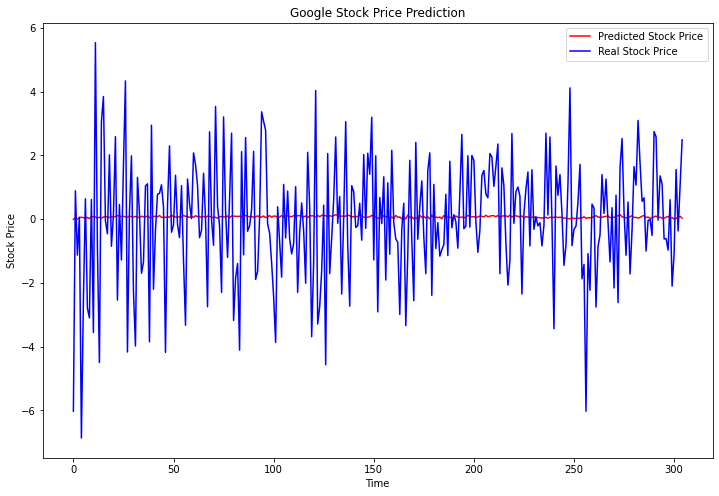

In [ ]:
#Visualization
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(predicted_stock_price_inverse,color='red',label='Predicted Stock Price')
plt.plot(real_stock_price_original,color='blue',label='Real Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [1]:
print("Error LSTM: 67.0354")

Error LSTM: 67.0354


Code inspired by: https://analyticsindiamag.com/how-to-do-multivariate-time-series-forecasting-using-lstm/